In [3]:
import pandas as pd
import pickle

import statsmodels.api as sm
from statsmodels.formula.api import glm

from sklearn.preprocessing import StandardScaler


import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
import os

In [4]:
biovar = 'bio18'

In [31]:
#finalgen_samples = pd.read_csv('../final_gen.csv')['sample_name']
last_gen = pd.read_csv('../key_files/final_gen.csv')['sample_name']
## eliminate site 33 
last_gen = last_gen[~last_gen.str.startswith('33_')]
## eliminate site 33 
samples = last_gen.to_list()

In [32]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
#clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_sites_era5_year_2018.csv')

sites_af = pd.Series(samples).str.split('_').str[0].astype(int)

sites_af.name = 'site'


In [33]:
env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

In [39]:
biovars = ['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8',
       'bio9', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16',
       'bio17', 'bio18', 'bio19']

In [40]:
for biovar in biovars:

    env_variable = env[biovar]
    
    # Standardize the environmental variable
    scaler = StandardScaler()
    env_variable_scaled = scaler.fit_transform(env_variable.values.reshape(-1, 1))
    
    pd.DataFrame(env_variable_scaled).to_csv(f'env_{biovar}.csv',index=None)

In [11]:
files = os.listdir('../baypass_lastgen/individual_gfiles_last_gen/')

In [12]:
partitions = [int(file.split('_')[1].replace('.txt', '')) for file in files if '.txt' in file]

In [13]:
partitions.sort()

In [72]:
pwd -P

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/binomial_regression_lastgen'

In [16]:
import random
import subprocess

In [17]:
biovar

'bio18'

In [44]:
biovars = [
 'bio2',
 'bio3',
 'bio4',
 'bio5',
 'bio6',
 'bio7',
 'bio8',
 'bio9',
 'bio10',
 'bio11',
 'bio13',
 'bio14',
 'bio15',
 'bio16',
 'bio17',
 'bio19']

In [54]:
# create sbatch files to submit on server
shfiles = []
for biovar in biovars:
    for partition in partitions:
        seed = random.randint(1,100000000)
        file = f'shfiles/partition_{partition}_{biovar}.sh'
        cmd = f'python run_partition_binomial_reg_last_gen.py {partition} {biovar}'
        text = f'''#!/bin/bash
#SBATCH --job-name=run_partition_binomial_reg{partition}
#SBATCH --time=4:00:00  # Time limit set to 4 days
#SBATCH --ntasks=1
#SBATCH --mem-per-cpu=30gb
#SBATCH --output=run_partition_binomial_reg{partition}_{biovar}_%j.out
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

module load python/3.11_conda
conda activate /home/tbellagio/miniforge3/envs/pipeline_snakemake
export LD_LIBRARY_PATH="/home/tbellagio/miniforge3/envs/run_baypass/lib:$LD_LIBRARY_PATH"
cd /carnegie/nobackup/scratch/tbellagio/gea_grene-net/binomial_regression_lastgen
{cmd}

'''
        with open(file, 'w') as o:
            o.write("%s" % text)
        shfiles.append(file)
        #print(file)

In [55]:
len(shfiles)

3150

In [28]:
#subprocess.run(["sbatch", shfiles[0]], check=True)

In [56]:
import subprocess
import time

# Process files in batches of 100
for i in range(0, len(shfiles), 100):
    # Get the next batch of up to 100 files
    batch = shfiles[i:i+100]

    # Submit each sbatch script in the current batch to the SLURM scheduler
    for shfile in batch:
        subprocess.run(["sbatch", shfile], check=True)

    # Wait for 2 minutes (120 seconds) before submitting the next batch
    if i + 100 < len(shfiles):  # Prevent waiting after the last batch
        time.sleep(120)


Submitted batch job 58608
Submitted batch job 58609
Submitted batch job 58610
Submitted batch job 58611
Submitted batch job 58612
Submitted batch job 58613
Submitted batch job 58614
Submitted batch job 58615
Submitted batch job 58616
Submitted batch job 58617
Submitted batch job 58618
Submitted batch job 58619
Submitted batch job 58620
Submitted batch job 58621
Submitted batch job 58622
Submitted batch job 58623
Submitted batch job 58624
Submitted batch job 58625
Submitted batch job 58626
Submitted batch job 58627
Submitted batch job 58628
Submitted batch job 58629
Submitted batch job 58630
Submitted batch job 58631
Submitted batch job 58632
Submitted batch job 58633
Submitted batch job 58634
Submitted batch job 58635
Submitted batch job 58636
Submitted batch job 58637
Submitted batch job 58638
Submitted batch job 58639
Submitted batch job 58640
Submitted batch job 58641
Submitted batch job 58642
Submitted batch job 58643
Submitted batch job 58644
Submitted batch job 58645
Submitted ba

In [57]:
for biovar in biovars:
    print(biovar)
    partitions_r = {}
    for i in range(len(partitions)):
        pickle_file_path = f'../baypass_lastgen/individual_gfiles_last_gen/loci_partition_{i}'
        with open(pickle_file_path, 'rb') as file:
            loci_f = pickle.load(file)
        results = pd.read_csv(f'results_{biovar}/partition{i}.csv')
        results['snp_id'] = loci_f
        partitions_r[i] = results

    results = pd.concat(partitions_r).reset_index(drop=True)
    
    results.to_csv(f'{biovar}_binomial_reg_results_last_gen.csv',index=None)

bio3
bio4
bio5
bio6
bio7
bio8
bio9
bio10
bio11
bio13
bio14
bio15
bio16
bio17
bio19


In [83]:
biovar = 'bio18'

In [29]:
loci_names = [file for file in files if 'loci' in file]

In [30]:
partition = 0 

In [82]:
pickle_file_path = f'../baypass_lastgen/individual_gfiles_last_gen/loci_partition_{partition}'
with open(pickle_file_path, 'rb') as file:
    loci_f = pickle.load(file)

In [13]:
binomf = pd.read_csv(f'{biovar}_binomial_reg_results_last_gen.csv')

In [14]:
binomf = binom.sort_values('pvalue').head(100)

In [15]:
import pickle
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [16]:
binomf['block'] = binomf['snp_id'].map(reverse_mapping)

In [17]:
binomf = binomf.drop_duplicates('block')

In [18]:
biovar = 'bio18'

In [20]:
binomf.to_csv(f'top_hits_binom_last_gen_{biovar}.csv')

In [19]:
binomf

,slope,pvalue,snp_id,block
1019491,0.446543,0.000000e+00,5_23517896,5_2800
251289,-0.738521,0.000000e+00,1_27305725,1_4940
360788,-0.655283,0.000000e+00,2_9924439,2_1000
276924,-0.599578,0.000000e+00,2_258907,2_89
216154,-1.059550,0.000000e+00,1_24164130,1_4155
21230,-0.513580,0.000000e+00,1_2987541,1_360
265491,-0.471910,0.000000e+00,1_29200398,1_5115
727547,-0.869354,0.000000e+00,4_10274568,4_2042
161693,-0.776530,0.000000e+00,1_19426195,1_2697
751222,-1.058852,0.000000e+00,4_12571790,4_2552


In [5]:
binom

,slope,pvalue,snp_id
0,-0.021596,6.688579e-02,1_346
1,-0.077940,1.952474e-04,1_353
2,0.125312,2.717472e-13,1_363
3,-0.494324,1.364982e-85,1_395
4,-0.494324,1.364982e-85,1_396
...,...,...,...
1048630,0.281729,2.708040e-76,5_26975078
1048631,-0.081247,1.021719e-04,5_26975121
1048632,-0.081247,1.021719e-04,5_26975148
1048633,-0.029124,6.896039e-03,5_26975272


In [88]:
len(results['snp_id'].unique())

1048635

In [89]:
1048635 - 1048635

0

In [90]:
len(results)

1048635

In [91]:
all_loci = []
for i in loci_names:
    pickle_file_path = f'../baypass_lastgen/individual_gfiles_last_gen/{i}'
    with open(pickle_file_path, 'rb') as file:
        loci_f = pickle.load(file)
    all_loci.append(loci_f)

In [92]:
flattened_loci = [item for sublist in all_loci for item in sublist]

In [93]:
len(flattened_loci)

1048635

In [30]:
biovar = 'bio18'

binom = pd.read_csv(f'{biovar}_binomial_reg_results_last_gen.csv')

binom['chrom'] = binom['snp_id'].str.split('_').str[0].astype(int)
binom['pos'] = binom['snp_id'].str.split('_').str[1].astype(int)

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1205603/2443793408.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


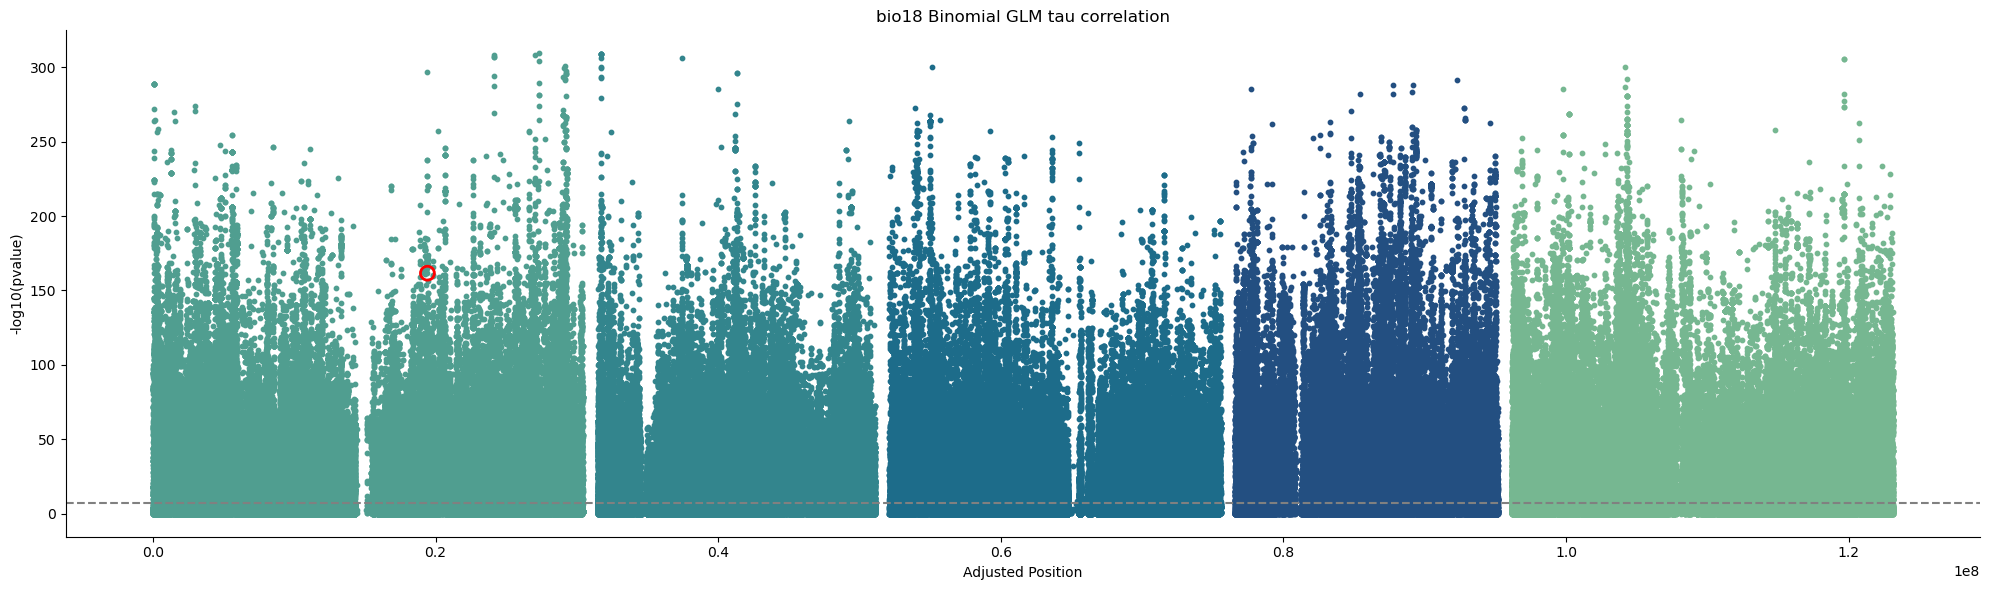

In [31]:
threshold_value = 0.05 / len(binom)

#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = binom[['pvalue', 'pos', 'chrom']].copy()

colors = sns.color_palette("crest", n_colors = 5)

# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['pvalue'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


#genes = ['2_199', '3_2730', '5_2244']
genes = ['1_19426350']
# Add circles around the specific genes
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',  # Color of the edge of the circle
            linewidth=2,      # Width of the edge line
            facecolor='none', # Facecolor of the circle (None means transparent)
            s=100,            # Size of the circle
            label=f'Gene {gene}'
        )

    
# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')
plt.title(f'{biovar} Binomial GLM tau correlation')  # Set the title

# Show the plot
plt.tight_layout()
plt.savefig(f'manhattan_binom_{biovar}.png')
plt.show()

In [29]:
df

NameError: name 'df' is not defined

In [27]:
binom[binom['snp_id'].isin(dict_blocks['1_2697'])]

,slope,pvalue,snp_id
161689,-0.696014,8.405237e-121,1_19425748
161690,0.068115,3.996036e-03,1_19425815
161691,0.188093,5.229671e-26,1_19425821
161692,-0.067139,6.372973e-06,1_19425982
161693,-0.776530,0.000000e+00,1_19426195
161694,-0.678033,2.576877e-162,1_19426350


In [23]:
dict_blocks['1_2697']

['1_19425693',
 '1_19425731',
 '1_19425748',
 '1_19425815',
 '1_19425821',
 '1_19425837',
 '1_19425841',
 '1_19425889',
 '1_19425911',
 '1_19425923',
 '1_19425930',
 '1_19425982',
 '1_19426016',
 '1_19426040',
 '1_19426043',
 '1_19426049',
 '1_19426073',
 '1_19426081',
 '1_19426095',
 '1_19426152',
 '1_19426195',
 '1_19426206',
 '1_19426291',
 '1_19426350']